In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load the dataset
file_path = "E:/adeebs_lab_codes/analysis/Medical inventroy optimization analysis/Dataset/Medical Inventory Optimaization Dataset.xlsx"
df = pd.read_excel(file_path)

In [4]:
df.head()

,Typeofsales,Patient_ID,Specialisation,Dept,Dateofbill,Quantity,ReturnQuantity,Final_Cost,Final_Sales,RtnMRP,Formulation,DrugName,SubCat,SubCat1
0,Sale,12018098765,Specialisation6,Department1,2022-01-06 00:00:00,1,0,55.406,59.260,0.0,Form1,ZINC ACETATE 20MG/5ML SYP,SYRUP & SUSPENSION,VITAMINS & MINERALS
1,Sale,12018103897,Specialisation7,Department1,7/23/2022,1,0,768.638,950.800,0.0,Form1,CEFTAZIDIME 2GM+AVIBACTAM 500MG,INJECTIONS,ANTI-INFECTIVES
2,Sale,12018101123,Specialisation2,Department3,6/23/2022,1,0,774.266,4004.214,0.0,Form2,EPTIFIBATIDE 0.75MG/ML,INJECTIONS,CARDIOVASCULAR & HEMATOPOIETIC SYSTEM
3,Sale,12018079281,Specialisation40,Department1,3/17/2022,2,0,40.798,81.044,0.0,Form1,WATER FOR INJECTION 10ML SOLUTION,INJECTIONS,INTRAVENOUS & OTHER STERILE SOLUTIONS
4,Sale,12018117928,Specialisation5,Department1,12/21/2022,1,0,40.434,40.504,0.0,Form1,LORAZEPAM 1MG,TABLETS & CAPSULES,CENTRAL NERVOUS SYSTEM


In [5]:
df.shape

(14218, 14)

In [6]:
#checking for missing values
df.isnull().sum()

Typeofsales          0
Patient_ID           0
Specialisation       0
Dept                 0
Dateofbill           0
Quantity             0
ReturnQuantity       0
Final_Cost           0
Final_Sales          0
RtnMRP               0
Formulation        653
DrugName          1668
SubCat            1668
SubCat1           1692
dtype: int64

In [7]:
df.columns

Index(['Typeofsales', 'Patient_ID', 'Specialisation', 'Dept', 'Dateofbill',
       'Quantity', 'ReturnQuantity', 'Final_Cost', 'Final_Sales', 'RtnMRP',
       'Formulation', 'DrugName', 'SubCat', 'SubCat1'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14218 entries, 0 to 14217
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Typeofsales     14218 non-null  object 
 1   Patient_ID      14218 non-null  int64  
 2   Specialisation  14218 non-null  object 
 3   Dept            14218 non-null  object 
 4   Dateofbill      14218 non-null  object 
 5   Quantity        14218 non-null  int64  
 6   ReturnQuantity  14218 non-null  int64  
 7   Final_Cost      14218 non-null  float64
 8   Final_Sales     14218 non-null  float64
 9   RtnMRP          14218 non-null  float64
 10  Formulation     13565 non-null  object 
 11  DrugName        12550 non-null  object 
 12  SubCat          12550 non-null  object 
 13  SubCat1         12526 non-null  object 
dtypes: float64(3), int64(3), object(8)
memory usage: 1.5+ MB


In [9]:
df.describe()

,Patient_ID,Quantity,ReturnQuantity,Final_Cost,Final_Sales,RtnMRP
count,1.421800e+04,14218.000000,14218.000000,14218.000000,14218.000000,14218.000000
mean,1.201809e+10,2.231748,0.291954,124.823957,234.038300,29.126755
std,2.810229e+04,5.132043,1.643322,464.782794,671.261572,182.262335
min,1.201800e+10,0.000000,0.000000,40.000000,0.000000,0.000000
25%,1.201808e+10,1.000000,0.000000,44.928000,47.815000,0.000000
50%,1.201809e+10,1.000000,0.000000,53.650000,86.424000,0.000000
75%,1.201811e+10,2.000000,0.000000,77.800000,181.000000,0.000000
max,1.201813e+10,150.000000,50.000000,33178.000000,39490.000000,8014.000000


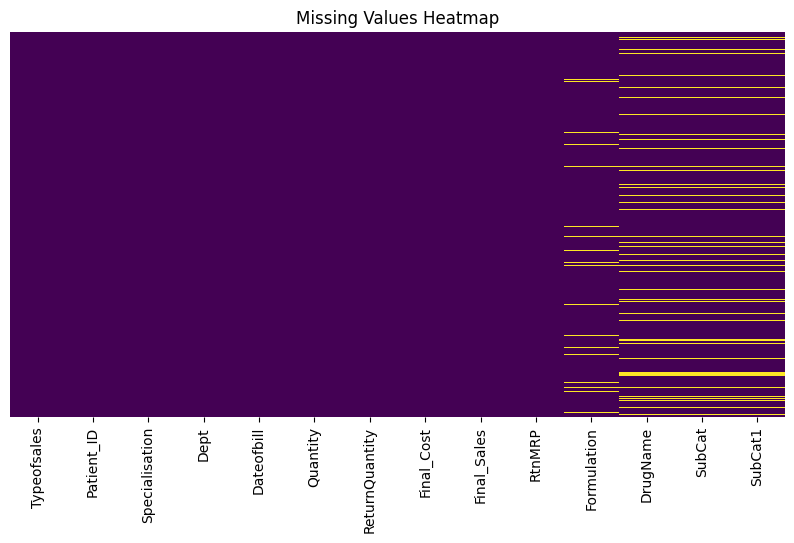

In [10]:
# Checking for missing values
plt.figure(figsize=(10,5))
sns.heatmap(df.isnull(), cmap='viridis', cbar=False, yticklabels=False)
plt.title("Missing Values Heatmap")
plt.show()

In [11]:
# Filling missing values (example: forward fill for time-series data, mean for numerical)
df.fillna(method='ffill', inplace=True)  # Modify as per dataset needs

C:\Users\Admin\AppData\Local\Temp\ipykernel_22352\254501738.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Modify as per dataset needs


AI MODEl

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report

# Encode categorical columns safely
df_encoded = df.copy()
categorical_cols = df_encoded.select_dtypes(include='object').columns
label_encoders = {}

for col in categorical_cols:
    df_encoded[col] = df_encoded[col].astype(str)  # Convert everything to string first
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])
    label_encoders[col] = le

# Example target: Predict if stock is Low (you can modify this based on actual column names)
df_encoded["ReturnQuantity"] = df_encoded["Quantity"].apply(lambda x: 1 if x < 50 else 0)

X = df_encoded.drop(columns=["Quantity", "ReturnQuantity"])
y = df_encoded["ReturnQuantity"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Evaluation
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.999648382559775
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.89      0.94         9
           1       1.00      1.00      1.00      2835

    accuracy                           1.00      2844
   macro avg       1.00      0.94      0.97      2844
weighted avg       1.00      1.00      1.00      2844



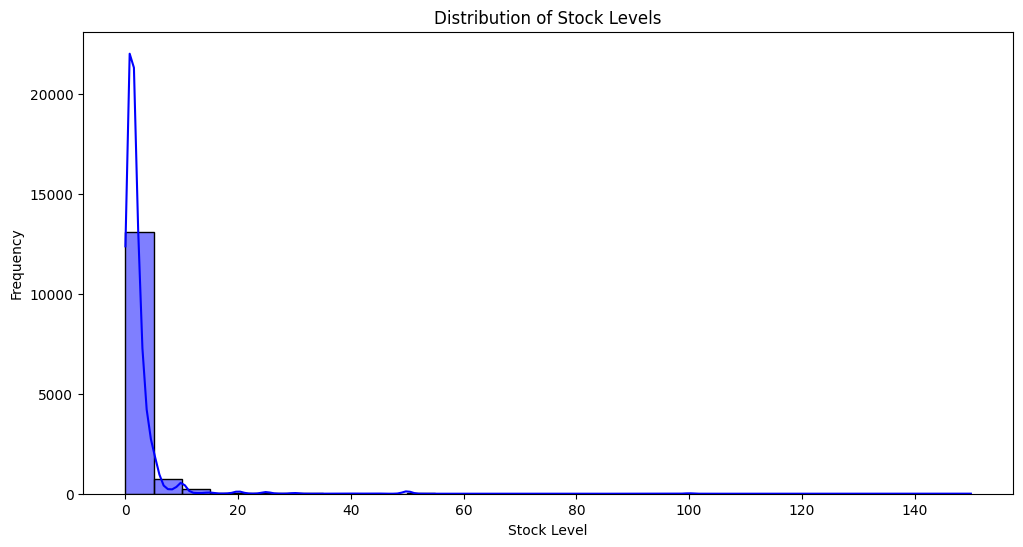

In [ ]:
# Checking the distribution of stock levels
plt.figure(figsize=(12,6))
sns.histplot(df['Quantity'], bins=30, kde=True, color='blue')
plt.title("Distribution of Stock Levels")
plt.xlabel("Stock Level")
plt.ylabel("Frequency")
plt.show()

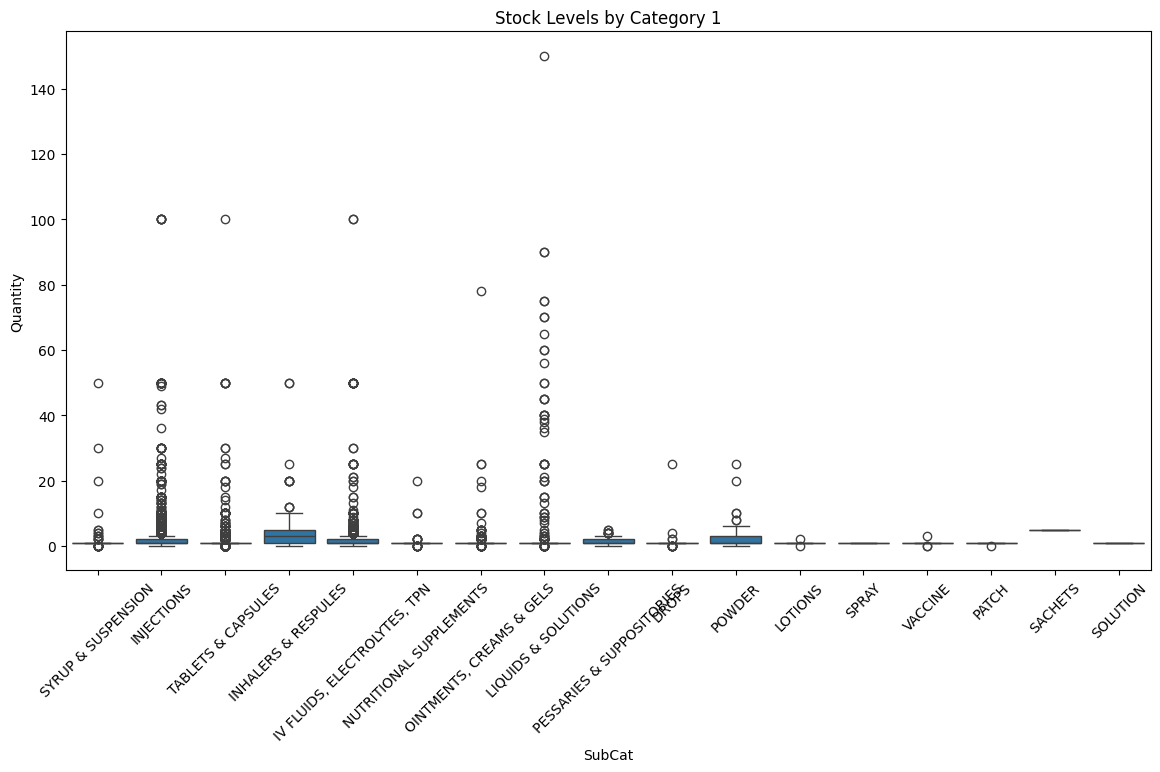

In [ ]:
# Category-wise stock distribution
plt.figure(figsize=(14,7))
sns.boxplot(x='SubCat', y='Quantity', data=df)
plt.xticks(rotation=45)
plt.title("Stock Levels by Category 1")
plt.show()

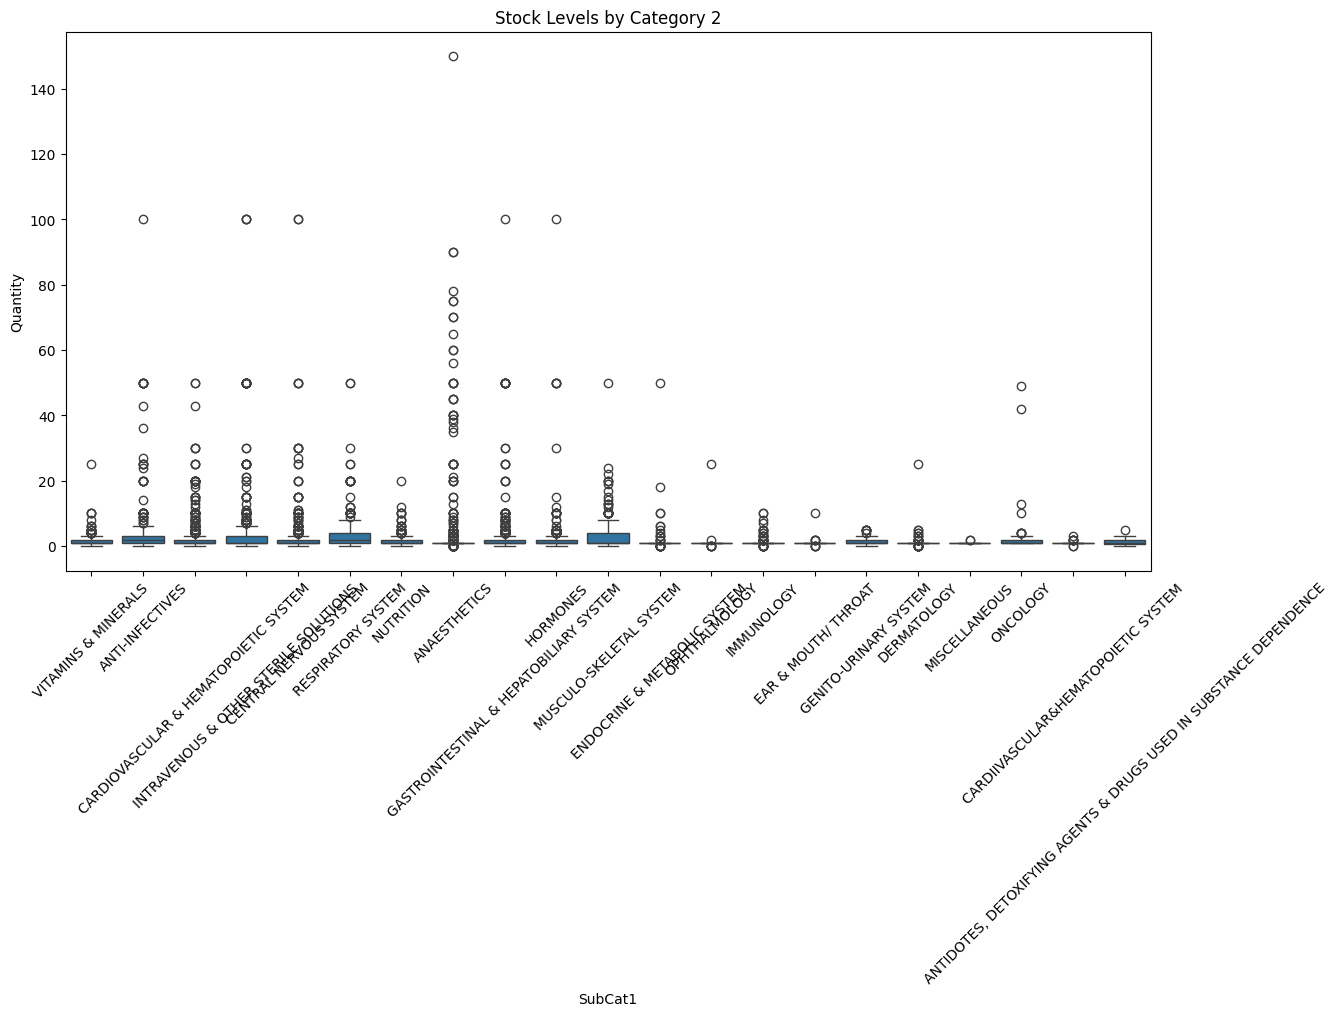

In [ ]:
# Category-wise stock distribution
plt.figure(figsize=(14,7))
sns.boxplot(x='SubCat1', y='Quantity', data=df)
plt.xticks(rotation=45)
plt.title("Stock Levels by Category 2")
plt.show()

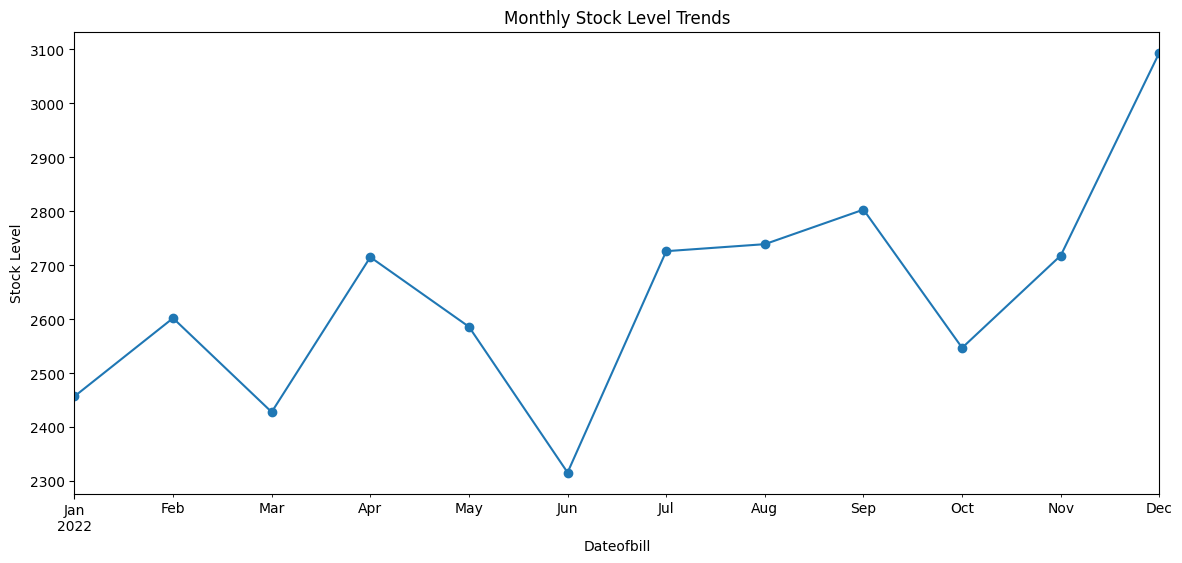

In [ ]:
# Monthly inventory trends (if date column exists)
# if 'Date' in df.columns:
df['Dateofbill'] = pd.to_datetime(df['Dateofbill'])
df.set_index('Dateofbill', inplace=True)
plt.figure(figsize=(14,6))
df['Quantity'].resample('M').sum().plot(marker='o', linestyle='-')
plt.title("Monthly Stock Level Trends")
plt.ylabel("Stock Level")
plt.show()

Typeofsales        object
Patient_ID          int64
Specialisation     object
Dept               object
Quantity            int64
ReturnQuantity      int64
Final_Cost        float64
Final_Sales       float64
RtnMRP            float64
Formulation        object
DrugName           object
SubCat             object
SubCat1            object
dtype: object


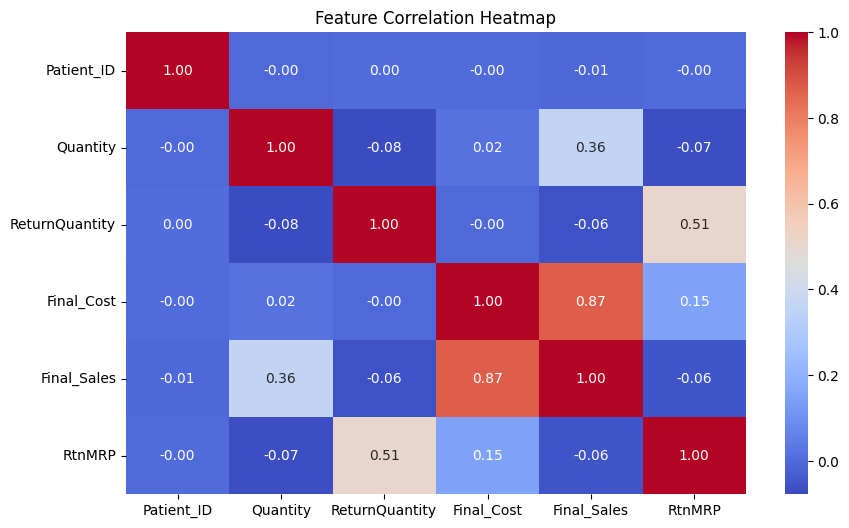

In [ ]:
# Display column data types
print(df.dtypes)

# Select only numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Check if numeric_df is empty (in case all columns are non-numeric)
if numeric_df.empty:
    print("No numeric columns found in the dataset. Please check the data.")
else:
    # Plot the heatmap
    plt.figure(figsize=(10,6))
    sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
    plt.title("Feature Correlation Heatmap")
    plt.show()


In [ ]:
# Insights & Optimization Recommendations
print("\nOptimization Recommendations:")
print("1. Identify slow-moving and fast-moving inventory items.")
print("2. Set reorder points based on consumption trends.")
print("3. Reduce overstocking by forecasting demand accurately.")
print("4. Implement Just-In-Time (JIT) inventory strategy to reduce waste.")
print("5. Monitor stock levels and restocking efficiency regularly.")


Optimization Recommendations:
1. Identify slow-moving and fast-moving inventory items.
2. Set reorder points based on consumption trends.
3. Reduce overstocking by forecasting demand accurately.
4. Implement Just-In-Time (JIT) inventory strategy to reduce waste.
5. Monitor stock levels and restocking efficiency regularly.
